In [8]:
file <- 'E:/summary/sept_casual.csv'
total_file <- 'E:/summary/sept_total.csv'
cas <- read.csv(file)
total <- read.csv(total_file)

In [2]:
casual1 = fpl[1:168, 'percent']
casual2 = fpl[169:336, 'percent']
casual3 = fpl[337:502, 'percent']
casual4 = fpl[503:672, 'percent']

In [9]:
casual = ts(cas[,'casual'], start=1, frequency = 24)

In [10]:
df_total =data.frame(total)
df_cas = data.frame(cas)

In [11]:
missing = df_total[,'total']<5000

In [12]:
df_total[missing, 'total'] <- NA
df_cas[missing, 'casual'] <-NA

In [42]:
ts_total = ts(na.locf(df_total[1:711,'total']))
ts_cas = ts(na.locf(df_cas[1:711, 'casual']))

In [46]:
percent = ts_cas/ts_total

In [49]:
casual = ts(percent[1:711], start=1, frequency = 24)

In [20]:
library(forecast)

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



In [63]:
decompose_and_plot <- function(ts){
fit = stl(ts, s.window='periodic')
plot(fit)
seasonal = fit[['time.series']][, 1]
plot(seasonal[1:24], type='l', xlab='hour', main='STL Daily') 
r=fit$time.series[,'remainder']
#     acf2(r, 100)
return(r)
}

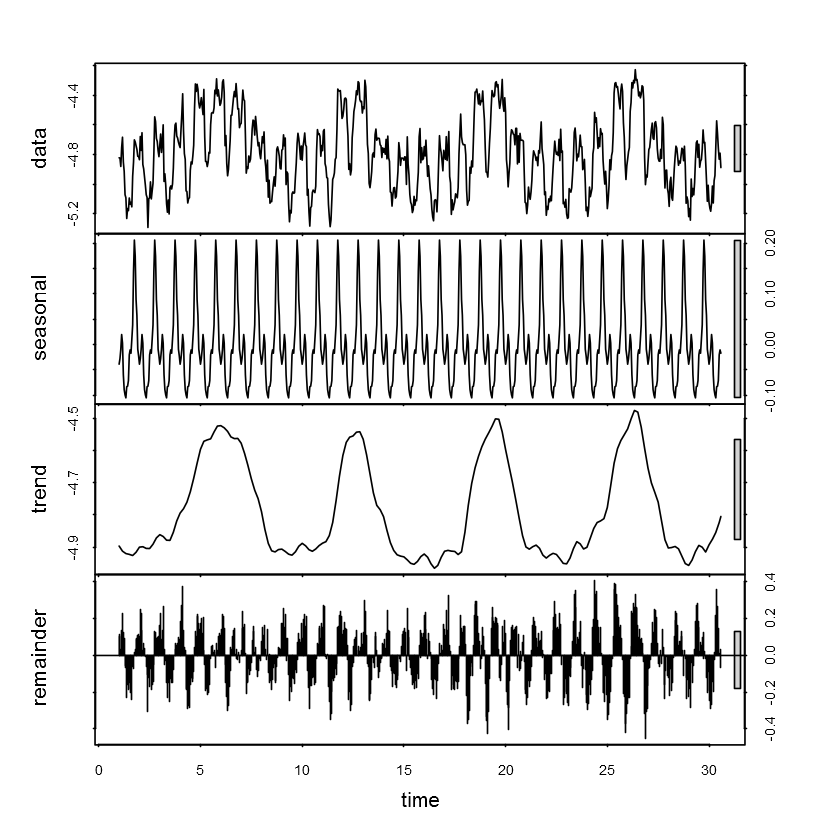

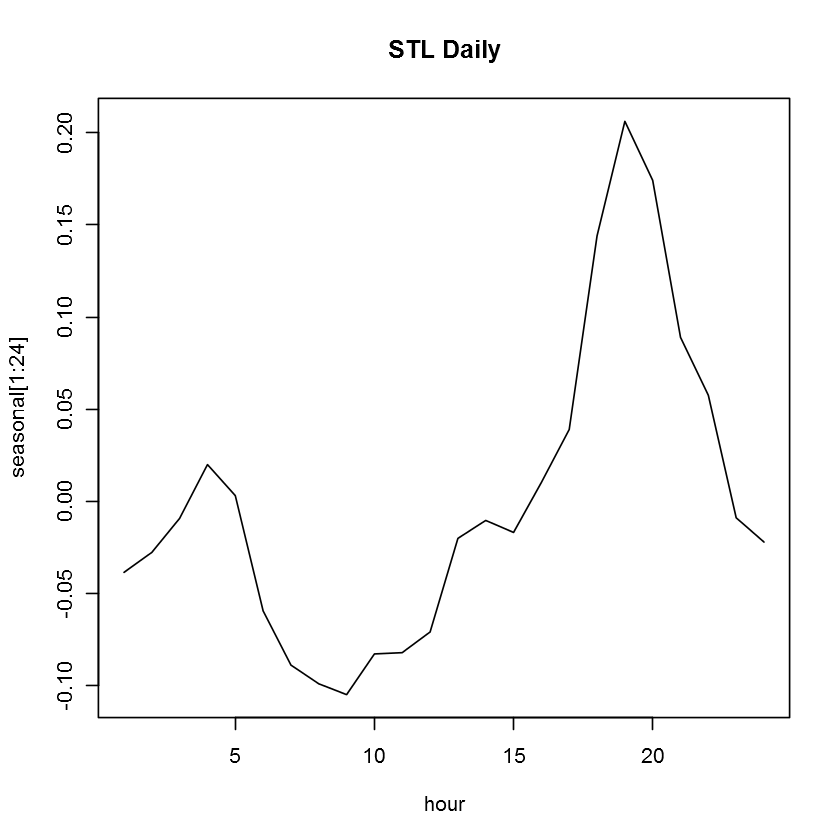

In [66]:
res = decompose_and_plot(log(casual))

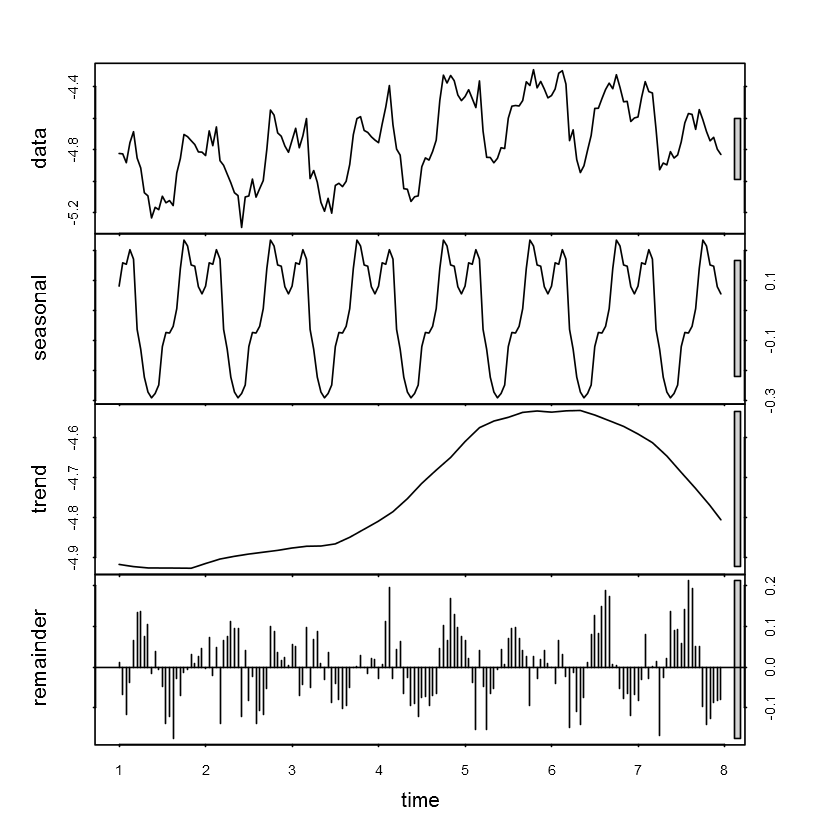

ERROR: Error in axis(1, at = seasonal[1:24], labels = rep(1:24, 2)): 'at' and 'labels' lengths differ, 24 != 48


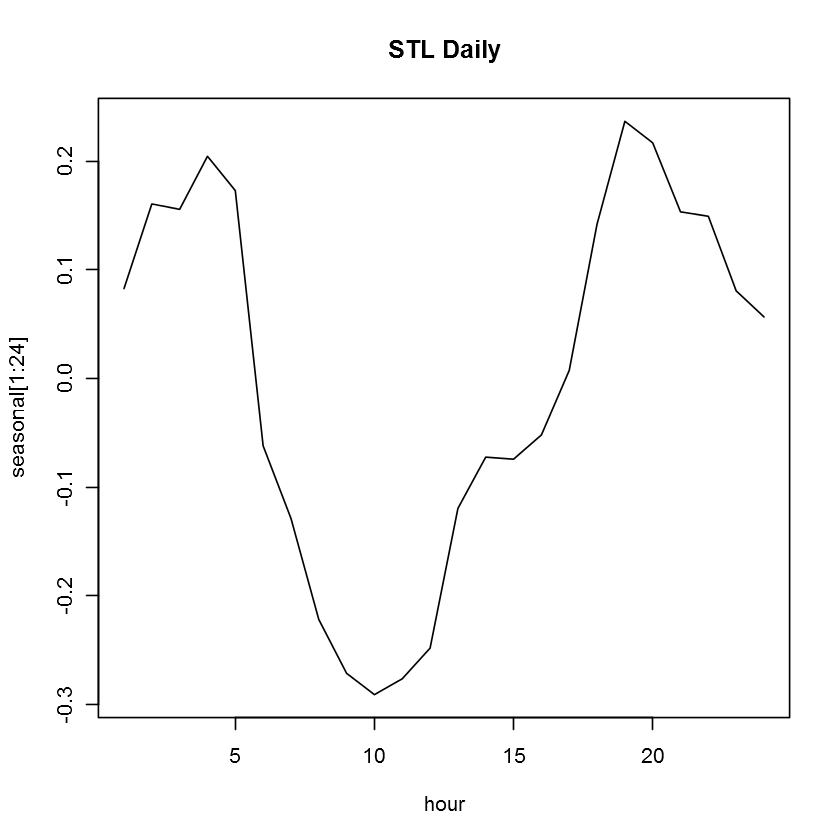

In [22]:
#season and trend with loess
fit = stl(lcasual, s.window='periodic')
plot(fit)
seasonal = fit[['time.series']][, 1]
plot(seasonal[1:24], type='l', xlab='hour', main='STL Daily')
axis(1, at=seasonal[1:24], labels=rep(1:24, 2))

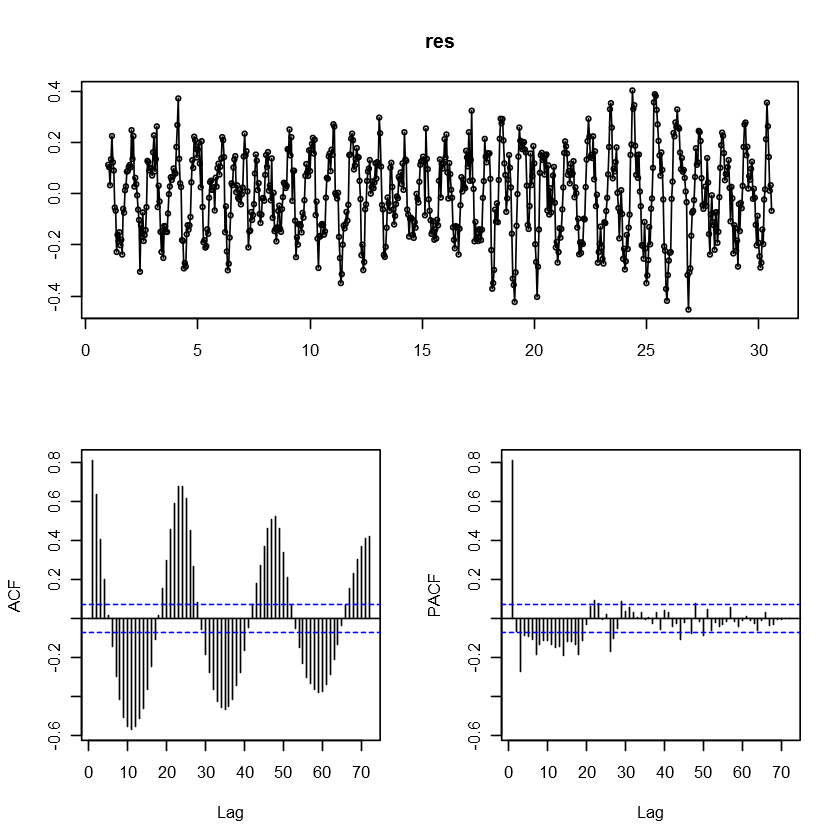

In [70]:
tsdisplay(res)

In [71]:
arima_fit = auto.arima(res)

In [73]:
arima_fit

Series: res 
ARIMA(2,0,1)(2,0,1)[24] with zero mean     

Coefficients:
          ar1     ar2     ma1    sar1    sar2     sma1
      -0.0460  0.5786  0.6872  0.6188  0.1232  -0.3993
s.e.   0.0923  0.0630  0.0984  0.1359  0.0666   0.1344

sigma^2 estimated as 0.007473:  log likelihood=731.17
AIC=-1448.34   AICc=-1448.18   BIC=-1416.38

In [49]:
arima(r, order=c(1, 0, 0))


Call:
arima(x = r, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.5733     0.0010
s.e.  0.0629     0.0123

sigma^2 estimated as 0.00467:  log likelihood = 212.2,  aic = -418.41

In [36]:
r=fit$time.series[,'remainder']

In [43]:
arima_fit = auto.arima(r)

In [44]:
arima_fit

Series: r 
ARIMA(2,0,2)(0,0,2)[24] with zero mean     

Coefficients:
         ar1      ar2      ma1     ma2     sma1    sma2
      1.7995  -0.9048  -1.4347  0.4870  -0.0578  0.4808
s.e.  0.0481   0.0460   0.1089  0.1039   0.0827  0.1268

sigma^2 estimated as 0.003305:  log likelihood=237.3
AIC=-460.6   AICc=-459.9   BIC=-438.73

ACF     PACF   
 [1,] "0.57"  "0.57" 
 [2,] "0.42"  "0.13" 
 [3,] "0.19"  "-0.14"
 [4,] "0"     "-0.15"
 [5,] "-0.19" "-0.19"
 [6,] "-0.27" "-0.07"
 [7,] "-0.41" "-0.23"
 [8,] "-0.43" "-0.13"
 [9,] "-0.41" "-0.08"
[10,] "-0.26" "0.05" 
[11,] "-0.18" "-0.05"
[12,] "-0.05" "-0.05"
[13,] "0"     "-0.11"
[14,] "-0.05" "-0.29"
[15,] "-0.01" "-0.09"
[16,] "-0.03" "-0.19"
[17,] "0.04"  "0.01" 
[18,] "-0.01" "-0.2" 
[19,] "0.12"  "0.11" 
[20,] "0.11"  "-0.06"
[21,] "0.18"  "-0.03"
[22,] "0.28"  "0.13" 
[23,] "0.38"  "0.09" 
[24,] "0.2"   "-0.22"
[25,] "0.27"  "0.16" 
[26,] "0.19"  "0.2"  
[27,] "-0.01" "-0.22"
[28,] "-0.18" "-0.12"
[29,] "-0.23" "0.11" 
[30,] "-0.31" "0.11" 
[31,] "..."   "..."  
[32,] "-0.12" "-0.02"
[33,] "-0.24" "-0.1" 
[34,] "-0.24" "0.04" 
[35,] "-0.17" "0.06" 
[36,] "-0.17" "0.01" 
[37,] "-0.14" "0"    
[38,] "-0.1"  "-0.06"
[39,] "-0.01" "0.03" 
[40,] "0.01"  "-0.03"
[41,] "0.08"  "-0.08"
[42,] "0.07"  "-0.06"
[43,] "0.07"  "0.01" 
[44,] "0.09"  "0"    
[45,] "0.14"  "0.04" 
[46,] "0.11"  "0.03" 
[47,] "0.14"  "-0.12"
[48,] "0.13"  "0.07" 
[49,] "0.11"  "-0.05"
[50,] "0.07"  "-0.07"
[51,] "0.03"  "-0.11"
[52,] "0"     "0.05" 
[53,] "-0.08" "-0.03"
[54,] "-0.11" "-0.01"
[55,] "-0.17" "-0.05"
[56,] "-0.22" "-0.06"
[57,] "-0.24" "-0.08"
[58,] "-0.15" "0.08" 
[59,] "-0.14" "0.04" 
[60,] "0"     "0.03" 
[61,] "0.06"  "-0.05"

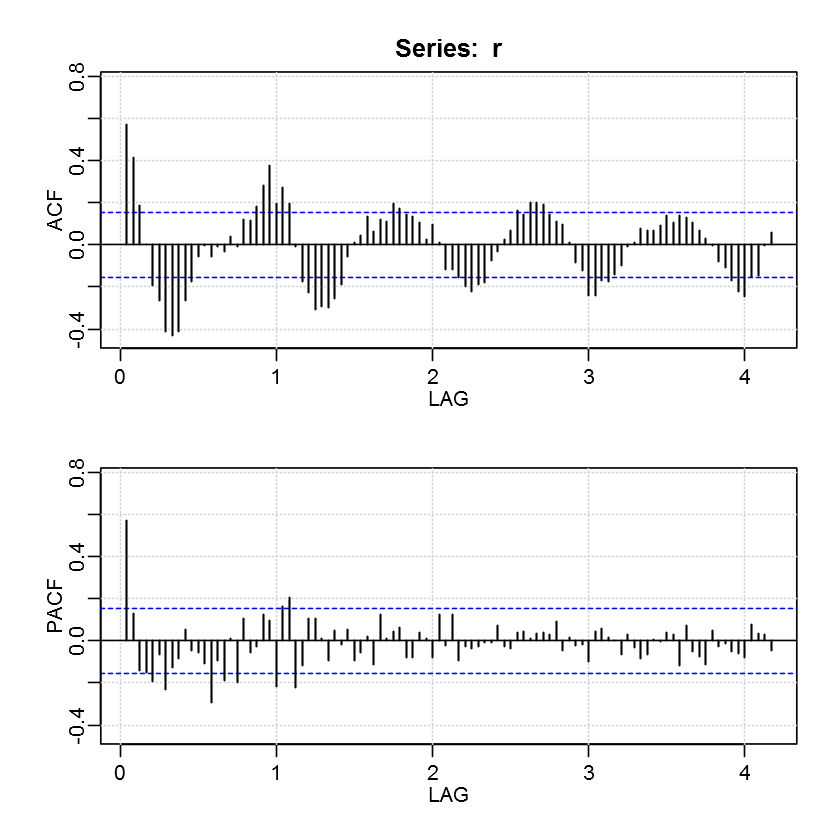

In [50]:
acf2(r, 100)

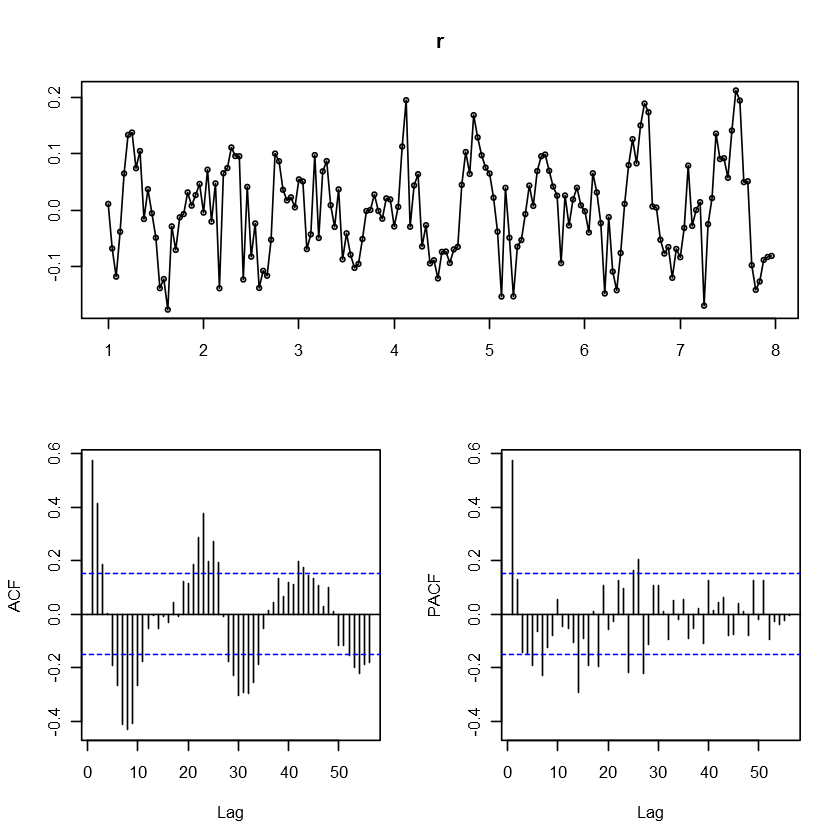

In [42]:
tsdisplay(r)

In [53]:
casual1 = ts(casual1, start=1, frequency = 24)
casual2 = ts(casual2, start=1, frequency = 24)
casual3 = ts(casual3, start=1, frequency = 24)
casual4 = ts(casual4, start=1, frequency = 24)

Original time series

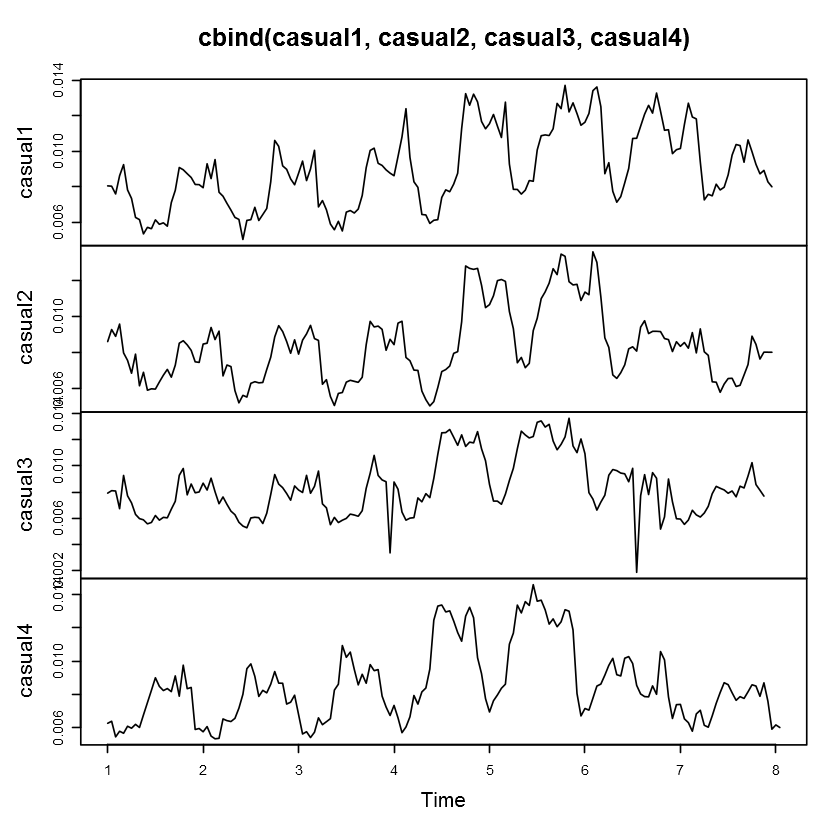

In [22]:
plot.ts(cbind(casual1, casual2, casual3, casual4))

Log to stabilize variance, hourly difference to remove trend over the week, 24 hour difference to remove daily seasonality

In [20]:
casual = ts(casual1, start=1, frequency = 24)

In [21]:
lcasual = log(casual); dlcasual = diff(lcasual); mdcasual=diff(lcasual, 24); ddlcasual = diff(dlcasual, 24);

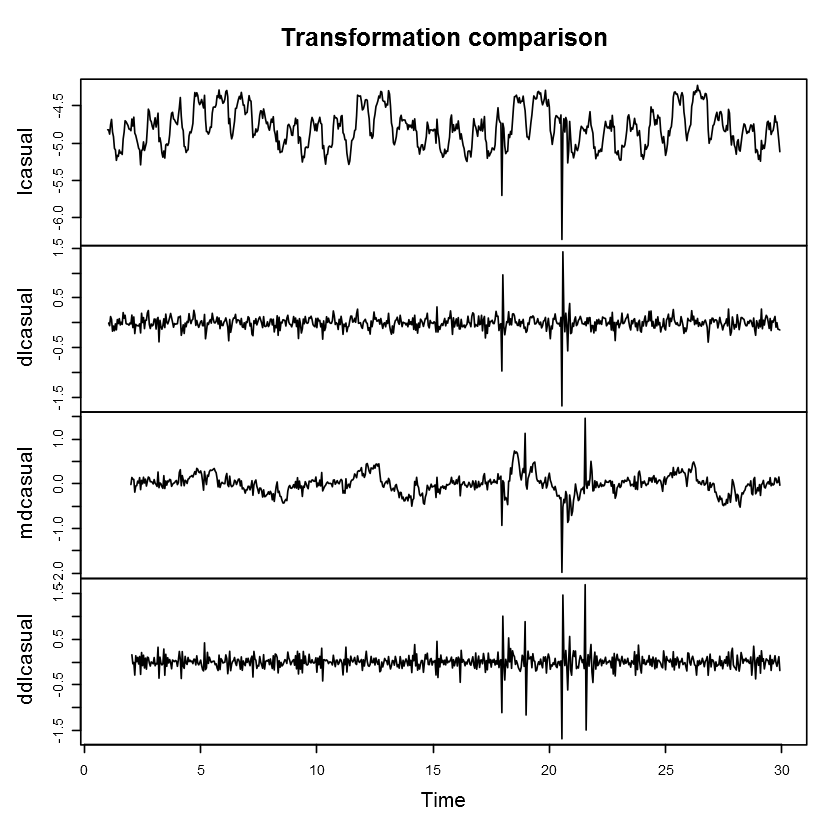

In [50]:
plot.ts(cbind(lcasual, dlcasual, mdcasual, ddlcasual), main='Transformation comparison')

In [41]:
library(forecast)

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 


Attaching package: 'forecast'

The following object is masked from 'package:astsa':

    gas



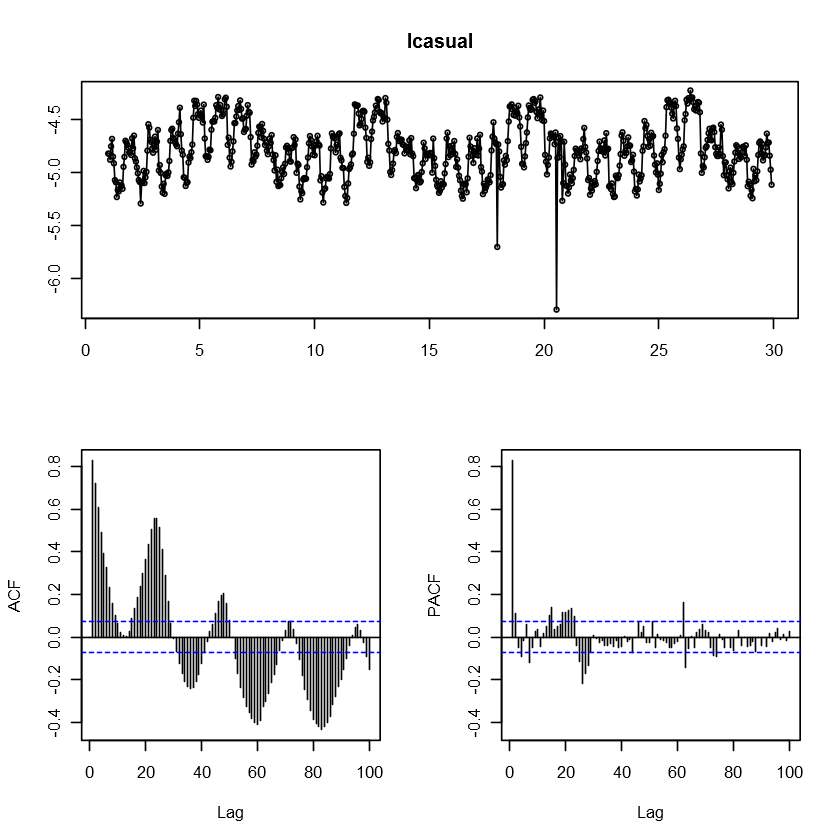

In [51]:
tsdisplay(lcasual, lag.max=100)

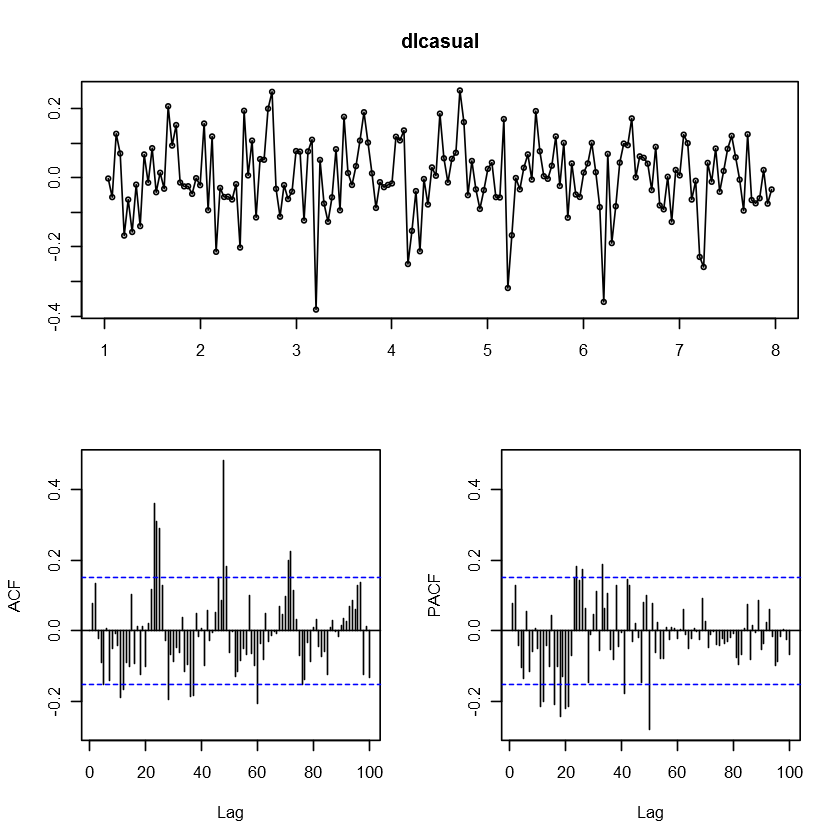

In [32]:
tsdisplay(dlcasual, lag.max=100)

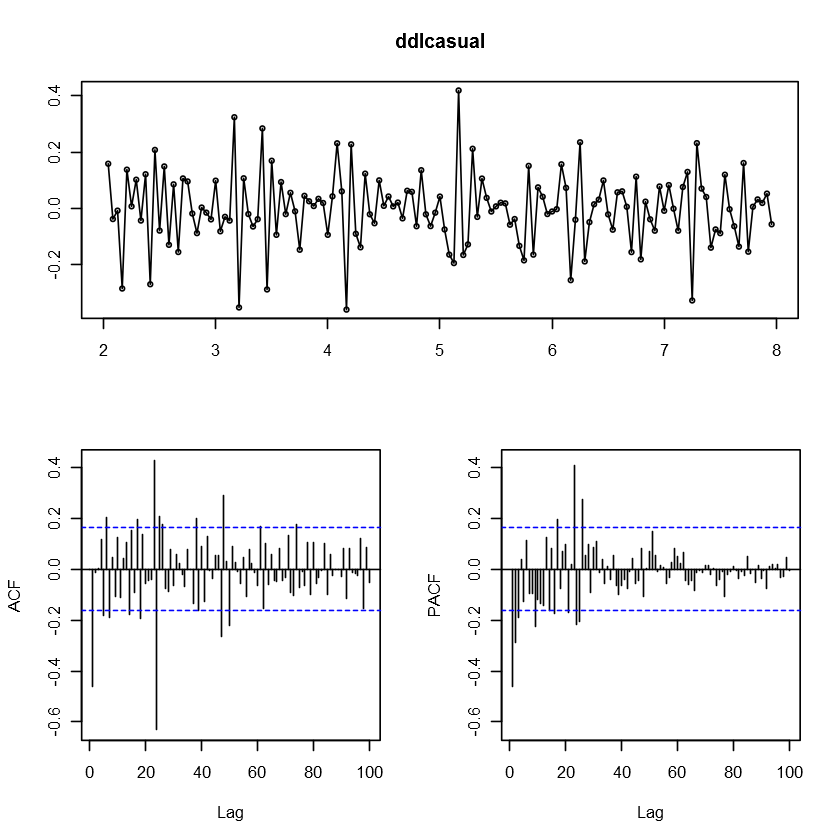

In [72]:
tsdisplay(ddlcasual, lag.max=100)

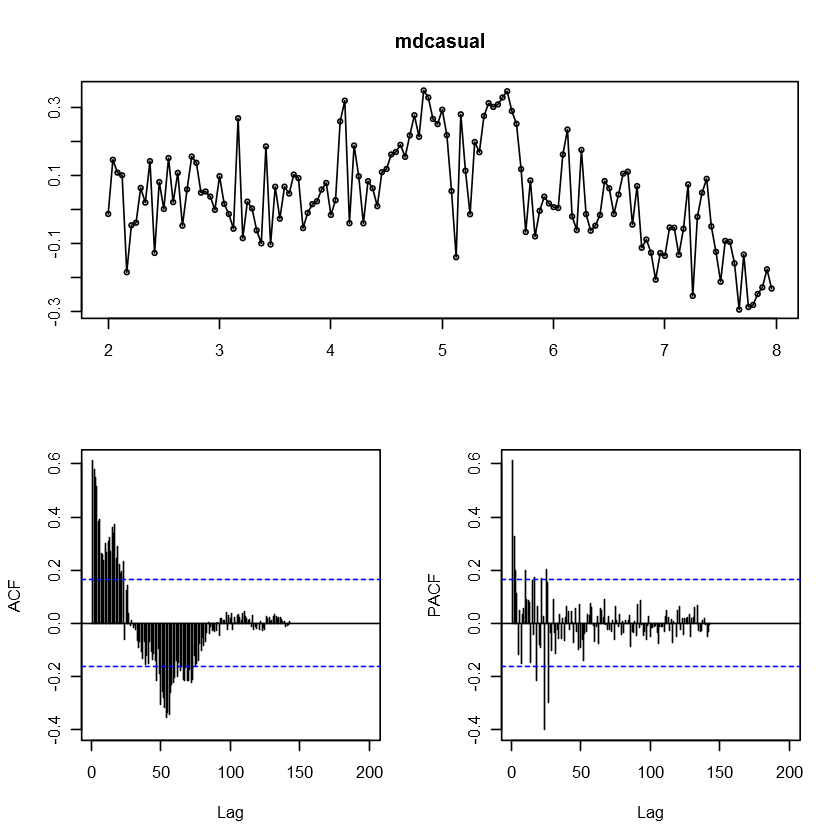

In [39]:
tsdisplay(mdcasual, lag.max=200)

In [76]:
library(astsa)


Attaching package: 'astsa'

The following object is masked from 'package:forecast':

    gas



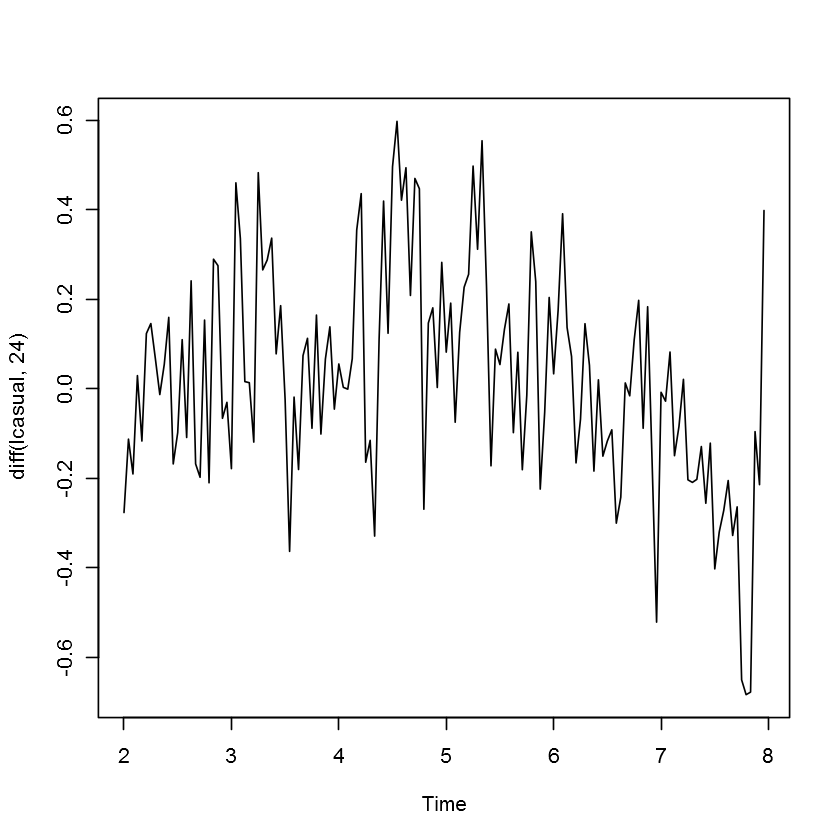

In [16]:
plot(diff(lcasual, 24))

ACF     PACF   
 [1,] "0.48"  "0.48" 
 [2,] "0.37"  "0.18" 
 [3,] "0.3"   "0.09" 
 [4,] "0.15"  "-0.08"
 [5,] "0.31"  "0.28" 
 [6,] "0.18"  "-0.07"
 [7,] "0.21"  "0.08" 
 [8,] "0.26"  "0.1"  
 [9,] "0.09"  "-0.1" 
[10,] "0.18"  "0.07" 
[11,] "0.14"  "0.03" 
[12,] "0.21"  "0.15" 
[13,] "0.15"  "-0.15"
[14,] "0.1"   "0.08" 
[15,] "0.18"  "0.07" 
[16,] "0.07"  "-0.09"
[17,] "0.19"  "0.15" 
[18,] "0.21"  "0.07" 
[19,] "0.16"  "0"    
[20,] "0.25"  "0.03" 
[21,] "0.04"  "-0.11"
[22,] "0.05"  "-0.05"
[23,] "0.06"  "-0.03"
[24,] "-0.15" "-0.24"
[25,] "0.04"  "0.13" 
[26,] "0.1"   "0.19" 
[27,] "0.11"  "-0.01"
[28,] "0.12"  "-0.06"
[29,] "0.02"  "0.07" 
[30,] "0.07"  "-0.04"
[31,] "..."   "..."  
[32,] "-0.09" "-0.06"
[33,] "-0.09" "-0.06"
[34,] "-0.12" "-0.08"
[35,] "-0.17" "0.02" 
[36,] "-0.21" "-0.08"
[37,] "-0.22" "0"    
[38,] "-0.17" "0.01" 
[39,] "-0.18" "0"    
[40,] "-0.17" "0.1"  
[41,] "-0.14" "-0.01"
[42,] "-0.09" "0.1"  
[43,] "0.03"  "-0.04"
[44,] "0.02"  "0"    
[45,] "-0.01" "0.07" 
[46,] "-0.01" "0"    
[47,] "-0.07" "0"    
[48,] "-0.09" "0"    
[49,] "-0.05" "0.03" 
[50,] "-0.03" "-0.02"
[51,] "0.01"  "0.04" 
[52,] "0.01"  "0.04" 
[53,] "0"     "0.08" 
[54,] "-0.03" "-0.01"
[55,] "-0.01" "0.06" 
[56,] "-0.01" "0.02" 
[57,] "-0.02" "-0.12"
[58,] "-0.02" "-0.07"
[59,] "-0.07" "-0.07"
[60,] "-0.03" "-0.08"
[61,] "0"     "-0.06"

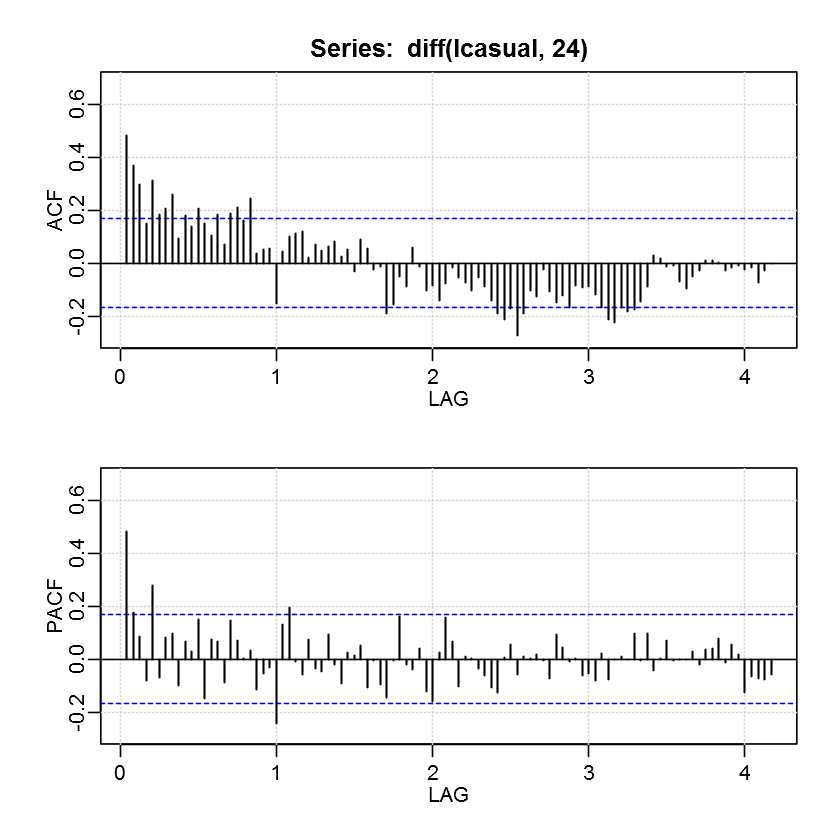

In [17]:
acf2(diff(lcasual, 24), 100)

ACF     PACF   
 [1,] "-0.41" "-0.41"
 [2,] "-0.05" "-0.25"
 [3,] "0.01"  "-0.14"
 [4,] "-0.02" "-0.11"
 [5,] "-0.06" "-0.15"
 [6,] "0.15"  "0.05" 
 [7,] "-0.06" "0.02" 
 [8,] "-0.06" "-0.06"
 [9,] "-0.06" "-0.16"
[10,] "0.11"  "-0.02"
[11,] "-0.01" "0.01" 
[12,] "0.01"  "0"    
[13,] "-0.01" "0"    
[14,] "-0.12" "-0.15"
[15,] "0.07"  "-0.05"
[16,] "0.05"  "0"    
[17,] "0.02"  "0.06" 
[18,] "-0.09" "-0.05"
[19,] "0.02"  "-0.04"
[20,] "0.03"  "0.04" 
[21,] "0.01"  "0.04" 
[22,] "0.02"  "0.02" 
[23,] "0.24"  "0.35" 
[24,] "-0.52" "-0.29"
[25,] "0.24"  "-0.05"
[26,] "0.07"  "0.06" 
[27,] "-0.05" "0.02" 
[28,] "0.01"  "0.02" 
[29,] "-0.02" "-0.1" 
[30,] "-0.07" "0"    
[31,] "..."   "..."  
[32,] "0.06"  "0.19" 
[33,] "-0.01" "-0.12"
[34,] "-0.03" "0.02" 
[35,] "0.02"  "-0.05"
[36,] "-0.01" "0.06" 
[37,] "0"     "0.03" 
[38,] "-0.01" "-0.06"
[39,] "0.04"  "0.02" 
[40,] "0.01"  "-0.03"
[41,] "-0.05" "-0.04"
[42,] "-0.02" "-0.06"
[43,] "0.04"  "0"    
[44,] "-0.05" "-0.03"
[45,] "0.04"  "0.01" 
[46,] "0.08"  "-0.05"
[47,] "-0.14" "0"    
[48,] "0.06"  "-0.03"
[49,] "0.01"  "-0.07"
[50,] "-0.02" "0.04" 
[51,] "-0.01" "-0.07"
[52,] "0.06"  "0.04" 
[53,] "-0.09" "0"    
[54,] "0.04"  "0.01" 
[55,] "0.01"  "-0.04"
[56,] "-0.03" "0.05" 
[57,] "0"     "-0.12"
[58,] "0.03"  "-0.02"
[59,] "0.01"  "0.01" 
[60,] "-0.05" "-0.08"
[61,] "0.06"  "0.08"

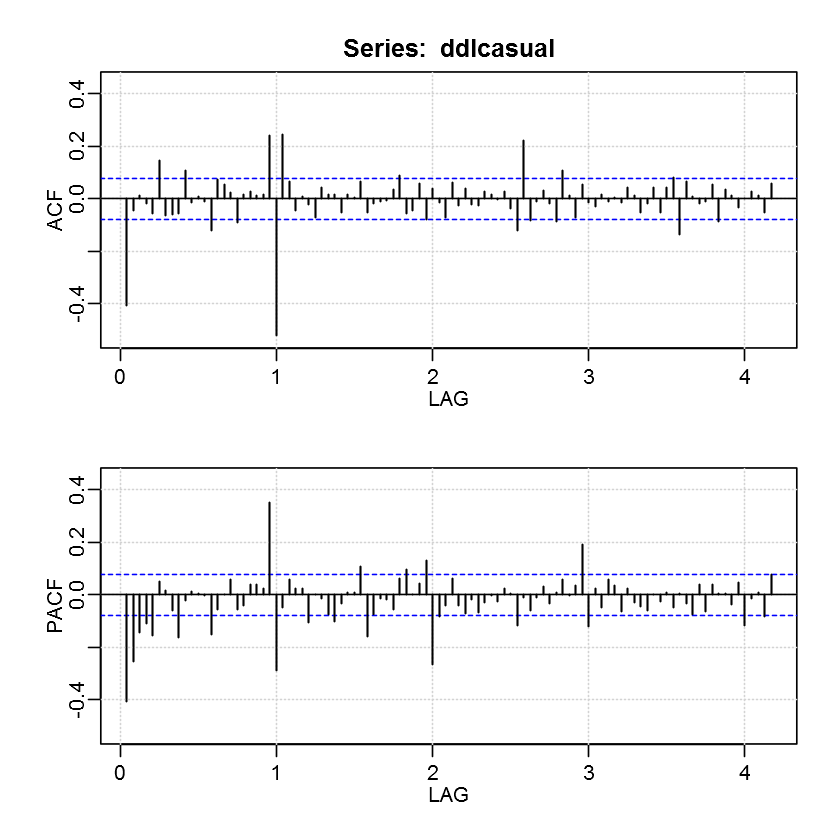

In [119]:
acf2(ddlcasual, 100)

In [111]:
arima(ddlcasual, order=c(0, 0, 1), seasonal=list(order=c(1, 0, 0), period=24))


Call:
arima(x = ddlcasual, order = c(0, 0, 1), seasonal = list(order = c(1, 0, 0), 
    period = 24))

Coefficients:
          ma1     sar1  intercept
      -0.5601  -0.5436    -0.0012
s.e.   0.0823   0.0750     0.0065

sigma^2 estimated as 0.06405:  log likelihood = -10.72,  aic = 29.44

In [23]:
arima(ddlcasual)['aic']

$aic
[1] 9.729252

In [71]:
compare_models <- function(ts)
    {
        for (p in 0:2){
            for (q in 0:2)
                {
                for (sp in 0:2){
                    for (sq in 0:2)
                        {
                        print(p)
                        print(q)
                        print(sp)
                        print(sq)
                        print(arima(ddlcasual, order = c(p, 0, q), seasonal = list(order = c(sp, 0, sq), period=24))['aic'])

                }
                    
            }
            }
        }
    }


In [72]:
compare_models(ddlcasual)

[1] 0
[1] 0
[1] 0
[1] 0
$aic
[1] 101.5198

[1] 0
[1] 0
[1] 0
[1] 1
$aic
[1] 26.01467

[1] 0
[1] 0
[1] 0
[1] 2
$aic
[1] 18.33375

[1] 0
[1] 0
[1] 1
[1] 0
$aic
[1] 44.65422

[1] 0
[1] 0
[1] 1
[1] 1
$aic
[1] 19.33995

[1] 0
[1] 0
[1] 1
[1] 2
$aic
[1] 18.01403

[1] 0
[1] 0
[1] 2
[1] 0
$aic
[1] 38.31304

[1] 0
[1] 0
[1] 2
[1] 1
$aic
[1] 21.29716

[1] 0
[1] 0
[1] 2
[1] 2


Warning message:
In arima(ddlcasual, order = c(p, 0, q), seasonal = list(order = c(sp, : possible convergence problem: optim gave code = 1

$aic
[1] 21.87926

[1] 0
[1] 1
[1] 0
[1] 0
$aic
[1] 30.12247

[1] 0
[1] 1
[1] 0
[1] 1
$aic
[1] -31.89407

[1] 0
[1] 1
[1] 0
[1] 2
$aic
[1] -31.15375

[1] 0
[1] 1
[1] 1
[1] 0
$aic
[1] -7.491309

[1] 0
[1] 1
[1] 1
[1] 1
$aic
[1] -31.01196

[1] 0
[1] 1
[1] 1
[1] 2


Warning message:
In arima(ddlcasual, order = c(p, 0, q), seasonal = list(order = c(sp, : possible convergence problem: optim gave code = 1

$aic
[1] -32.11367

[1] 0
[1] 1
[1] 2
[1] 0
$aic
[1] -10.97984

[1] 0
[1] 1
[1] 2
[1] 1
$aic
[1] -29.11366

[1] 0
[1] 1
[1] 2
[1] 2
$aic
[1] -30.2096

[1] 0
[1] 2
[1] 0
[1] 0
$aic
[1] 32.09723

[1] 0
[1] 2
[1] 0
[1] 1
$aic
[1] -30.18438

[1] 0
[1] 2
[1] 0
[1] 2
$aic
[1] -29.46955

[1] 0
[1] 2
[1] 1
[1] 0
$aic
[1] -5.622259

[1] 0
[1] 2
[1] 1
[1] 1
$aic
[1] -29.31492

[1] 0
[1] 2
[1] 1
[1] 2
$aic
[1] -30.25973

[1] 0
[1] 2
[1] 2
[1] 0
$aic
[1] -9.169522

[1] 0
[1] 2
[1] 2
[1] 1
$aic
[1] -27.44775

[1] 0
[1] 2
[1] 2
[1] 2
$aic
[1] -28.35272

[1] 1
[1] 0
[1] 0
[1] 0
$aic
[1] 55.56906

[1] 1
[1] 0
[1] 0
[1] 1
$aic
[1] -11.31536

[1] 1
[1] 0
[1] 0
[1] 2
$aic
[1] -12.70916

[1] 1
[1] 0
[1] 1
[1] 0
$aic
[1] 8.079472

[1] 1
[1] 0
[1] 1
[1] 1
$aic
[1] -12.66876

[1] 1
[1] 0
[1] 1
[1] 2


Warning message:
In arima(ddlcasual, order = c(p, 0, q), seasonal = list(order = c(sp, : possible convergence problem: optim gave code = 1

$aic
[1] -15.08486

[1] 1
[1] 0
[1] 2
[1] 0
$aic
[1] 6.147071

[1] 1
[1] 0
[1] 2
[1] 1
$aic
[1] -10.73866

[1] 1
[1] 0
[1] 2
[1] 2
$aic
[1] -13.07398

[1] 1
[1] 1
[1] 0
[1] 0
$aic
[1] 32.08764

[1] 1
[1] 1
[1] 0
[1] 1
$aic
[1] -30.38129

[1] 1
[1] 1
[1] 0
[1] 2
$aic
[1] -29.78295

[1] 1
[1] 1
[1] 1
[1] 0
$aic
[1] -5.836876

[1] 1
[1] 1
[1] 1
[1] 1
$aic
[1] -29.6079

[1] 1
[1] 1
[1] 1
[1] 2
$aic
[1] -30.24386

[1] 1
[1] 1
[1] 2
[1] 0
$aic
[1] -10.48831

[1] 1
[1] 1
[1] 2
[1] 1


Warning message:
In log(s2): NaNs produced

ERROR: Error in optim(init[mask], armafn, method = optim.method, hessian = TRUE, : non-finite finite-difference value [3]


In [68]:
array(1:6, dim=3)

[1] 1 2 3

In [74]:
library(forecast)

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 


Attaching package: 'forecast'

The following object is masked from 'package:astsa':

    gas



In [112]:
casual = casual4

In [117]:
lcasual = log(casual); dlcasual = diff(lcasual); ddlcasual = diff(dlcasual, 24);

In [118]:
fit = auto.arima(ddlcasual)
fit

Series: ddlcasual 
ARIMA(0,0,1)(0,0,1)[24] with zero mean     

Coefficients:
          ma1     sma1
      -0.4214  -0.7674
s.e.   0.0411   0.0292

sigma^2 estimated as 0.01885:  log likelihood=369.88
AIC=-733.77   AICc=-733.73   BIC=-720.25

In [67]:
fit = auto.arima(ddlcasual)
fit

Series: ddlcasual 
ARIMA(2,0,2)(1,0,0)[24] with zero mean     

Coefficients:
          ar1     ar2      ma1      ma2     sar1
      -0.1485  0.6277  -0.1644  -0.5936  -0.4099
s.e.   0.1700  0.1271   0.1649   0.1155   0.0843

sigma^2 estimated as 0.009643:  log likelihood=129.12
AIC=-246.23   AICc=-245.61   BIC=-228.45

In [ ]:
fit = auto.arima(ddlcasual)
fit

In [102]:
fit = auto.arima(ddlcasual)
fit

Series: ddlcasual 
ARIMA(3,0,1)(2,0,0)[24] with zero mean     

Coefficients:
         ar1     ar2     ar3      ma1     sar1     sar2
      0.2017  0.1472  0.1510  -0.9018  -0.6791  -0.2356
s.e.  0.1003  0.0927  0.0902   0.0503   0.0959   0.0987

sigma^2 estimated as 0.04701:  log likelihood=12.81
AIC=-11.63   AICc=-10.81   BIC=9.21

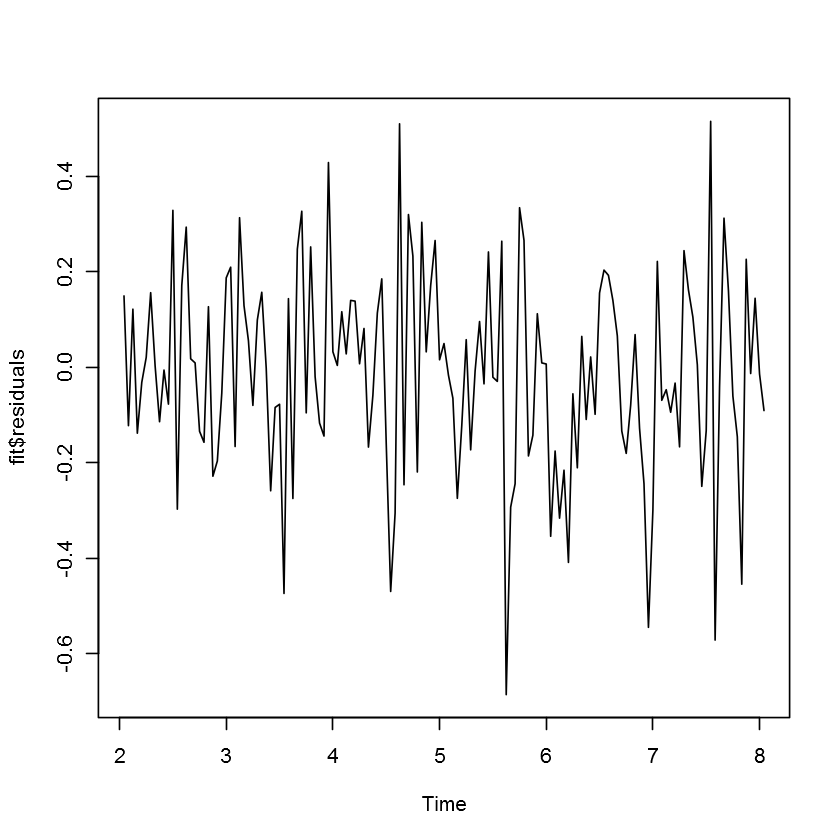

In [111]:
plot(fit$residuals)

ACF  PACF
 [1,]  0.05  0.05
 [2,]  0.08  0.08
 [3,]  0.00 -0.01
 [4,] -0.04 -0.05
 [5,] -0.04 -0.04
 [6,] -0.05 -0.04
 [7,] -0.10 -0.10
 [8,] -0.13 -0.13
 [9,] -0.13 -0.11
[10,] -0.13 -0.12
[11,] -0.09 -0.10
[12,] -0.08 -0.10
[13,] -0.03 -0.06
[14,] -0.11 -0.17
[15,] -0.05 -0.13
[16,] -0.01 -0.10
[17,]  0.04 -0.08
[18,]  0.01 -0.14
[19,]  0.00 -0.17
[20,]  0.06 -0.12
[21,]  0.10 -0.08
[22,]  0.17 -0.01
[23,]  0.21  0.07
[24,]  0.00 -0.13
[25,]  0.21  0.14
[26,]  0.05  0.04
[27,] -0.04 -0.05
[28,] -0.11 -0.12
[29,] -0.05 -0.01
[30,] -0.10 -0.02
[31,] -0.04  0.04
[32,] -0.06  0.03
[33,] -0.09  0.01
[34,] -0.07  0.01
[35,] -0.07  0.01
[36,] -0.03  0.03
[37,] -0.05 -0.01

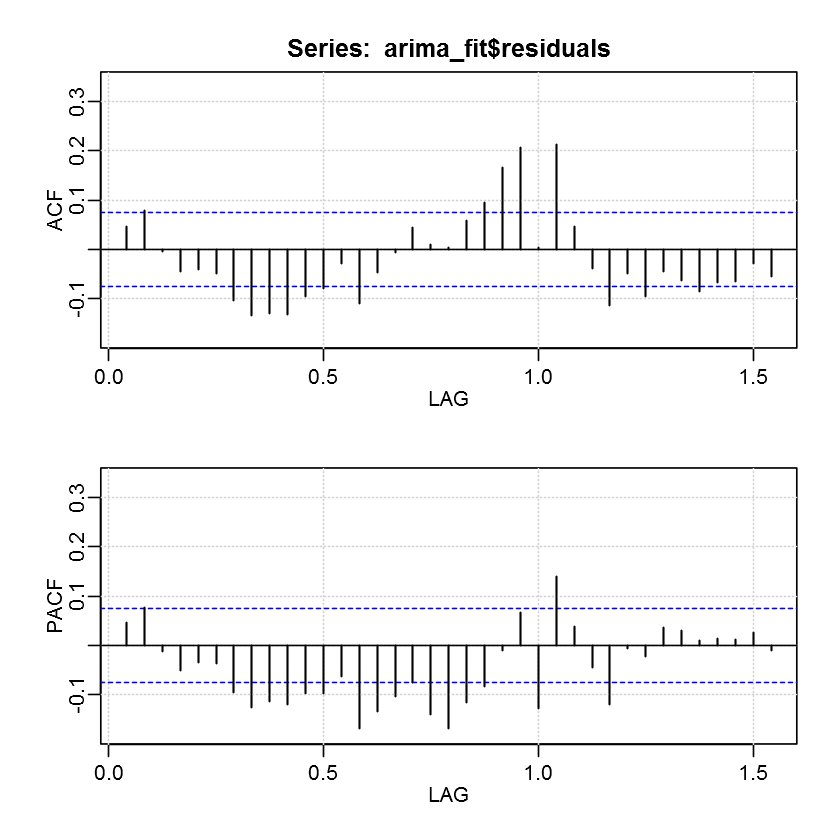

In [77]:
acf2(arima_fit$residuals)

In [123]:
Box.test(fit$residuals, lag=28, type= "Ljung-Box")


	Box-Ljung test

data:  fit$residuals
X-squared = 29.383, df = 28, p-value = 0.3933


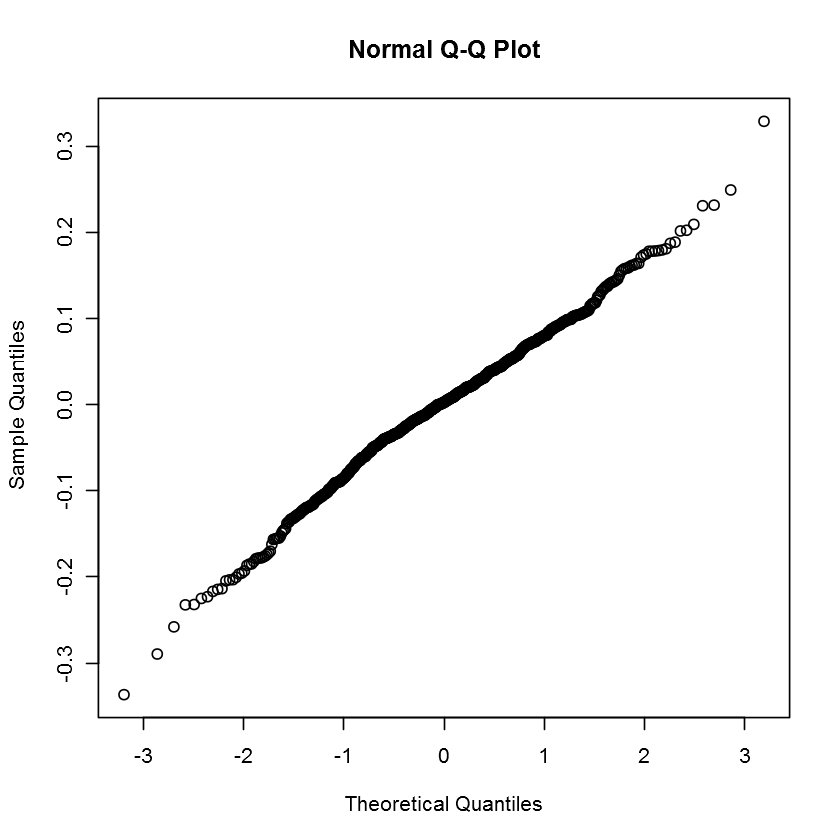

In [78]:
qqnorm(arima_fit$residuals)

In [82]:
cas_file <- 'E:/summary/june_casual.csv'
cas <- read.csv(cas_file)
total_file <- 'E:/summary/june_total.csv'
total <- read.csv(total_file)
df_total =data.frame(total)
df_cas = data.frame(cas)
missing = df_total[,'total']<5000
df_total[missing, 'total'] <- NA
df_cas[missing, 'casual'] <-NA
ts_total = ts(na.locf(df_total[,'total']))
ts_cas = ts(na.locf(df_cas[, 'casual']))

In [83]:
percent = ts_cas/ts_total

In [93]:
casual = ts(percent[48:720], start=1, frequency = 24)

In [87]:
length(casual)

[1] 724

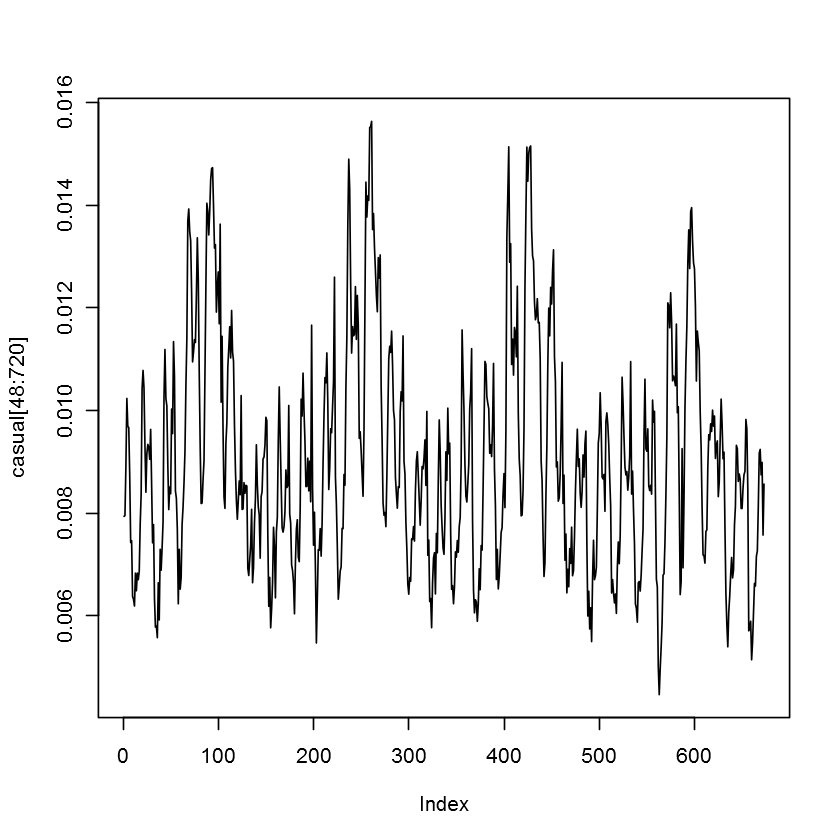

In [89]:
plot(casual[48:720], type='l')

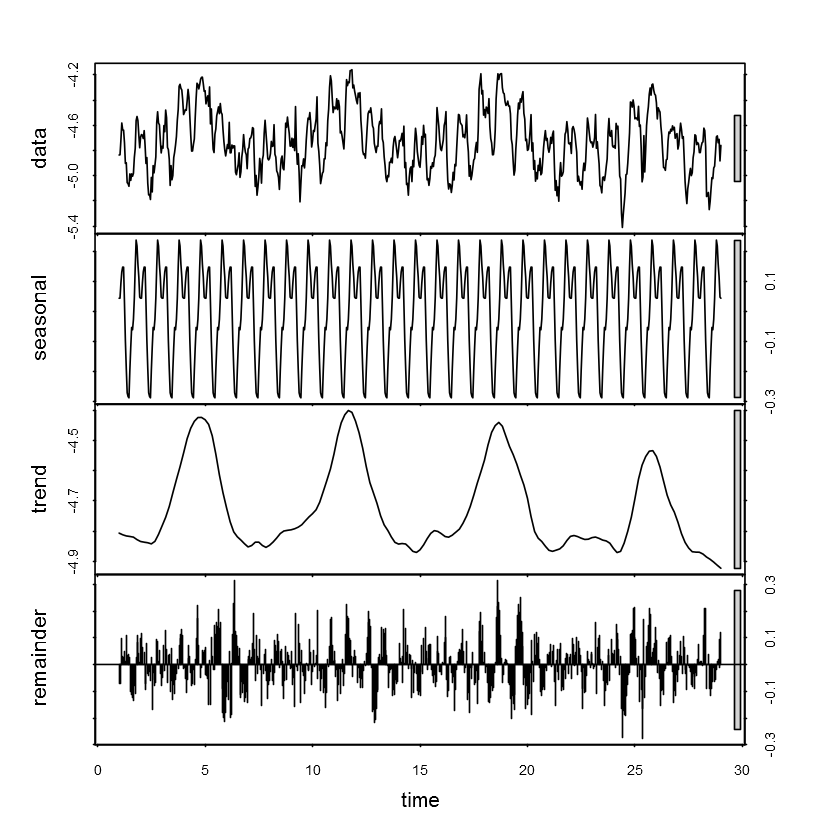

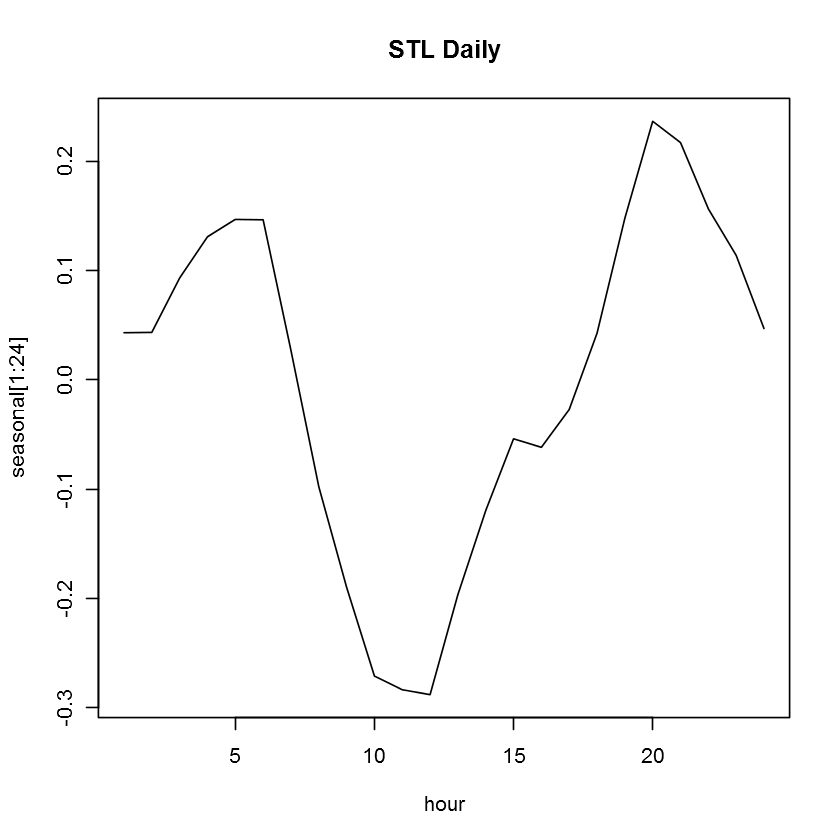

In [94]:
res = decompose_and_plot(log(casual))

ACF  PACF
 [1,]  0.58  0.58
 [2,]  0.42  0.13
 [3,]  0.24 -0.07
 [4,]  0.06 -0.15
 [5,] -0.12 -0.17
 [6,] -0.23 -0.11
 [7,] -0.30 -0.08
 [8,] -0.34 -0.10
 [9,] -0.39 -0.16
[10,] -0.39 -0.12
[11,] -0.38 -0.15
[12,] -0.32 -0.11
[13,] -0.25 -0.11
[14,] -0.13 -0.05
[15,] -0.03 -0.07
[16,]  0.11  0.02
[17,]  0.20 -0.02
[18,]  0.25 -0.06
[19,]  0.27 -0.05
[20,]  0.30  0.02
[21,]  0.27 -0.02
[22,]  0.28  0.08
[23,]  0.26  0.08
[24,]  0.20  0.03
[25,]  0.12  0.02
[26,] -0.01 -0.05
[27,] -0.09  0.02
[28,] -0.17  0.03
[29,] -0.29 -0.07
[30,] -0.30  0.00
[31,] -0.28  0.04
[32,] -0.28 -0.04
[33,] -0.19  0.05
[34,] -0.16 -0.05
[35,] -0.10 -0.02
[36,] -0.05 -0.04

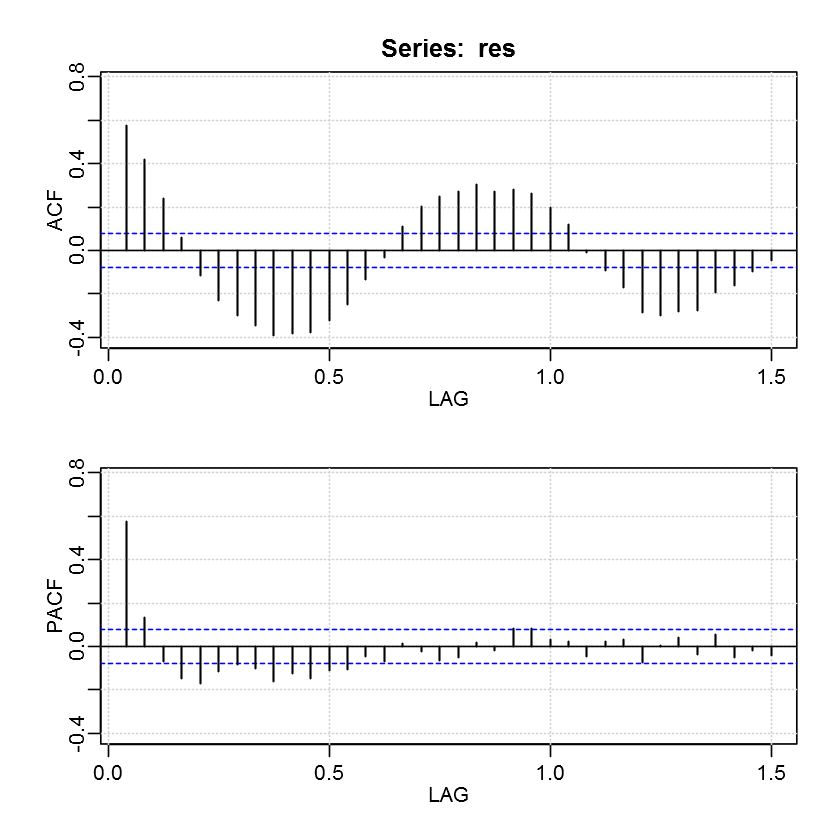

In [95]:
acf2(res)

In [100]:
arima_fit2 = arima(res, order=c(2, 0, 2), seasonal=list(order=c(2, 0, 2), period=24))

In [101]:
arima_fit2


Call:
arima(x = res, order = c(2, 0, 2), seasonal = list(order = c(2, 0, 2), period = 24))

Coefficients:
         ar1      ar2      ma1    ma2    sar1    sar2     sma1     sma2
      1.8023  -0.8940  -1.4673  0.522  0.1216  0.6663  -0.1218  -0.8782
s.e.  0.0270   0.0272   0.0555  0.057  0.0890  0.0864   0.0763   0.0757
      intercept
          0e+00
s.e.      9e-04

sigma^2 estimated as 0.00436:  log likelihood = 859.26,  aic = -1698.53

In [96]:
june_arima_fit = auto.arima(res)

In [102]:
june_arima_fit

Series: res 
ARIMA(2,0,2)(0,0,2)[24] with zero mean     

Coefficients:
         ar1      ar2      ma1     ma2    sma1     sma2
      1.8029  -0.8956  -1.4723  0.5267  0.0641  -0.1403
s.e.  0.0268   0.0268   0.0551  0.0565  0.0399   0.0431

sigma^2 estimated as 0.004748:  log likelihood=847.02
AIC=-1680.04   AICc=-1679.88   BIC=-1648.46

ACF  PACF
 [1,]  0.01  0.01
 [2,]  0.00  0.00
 [3,]  0.00  0.00
 [4,] -0.03 -0.03
 [5,] -0.06 -0.06
 [6,] -0.02 -0.02
 [7,]  0.03  0.03
 [8,]  0.08  0.08
 [9,]  0.02  0.02
[10,]  0.02  0.02
[11,]  0.00  0.00
[12,] -0.01  0.00
[13,] -0.05 -0.04
[14,]  0.00  0.00
[15,] -0.04 -0.04
[16,]  0.05  0.04
[17,]  0.06  0.06
[18,]  0.01  0.00
[19,] -0.02 -0.02
[20,]  0.03  0.03
[21,] -0.08 -0.07
[22,]  0.00  0.02
[23,]  0.05  0.05
[24,]  0.01  0.00
[25,]  0.05  0.04
[26,] -0.04 -0.05
[27,] -0.02 -0.02
[28,]  0.02  0.03
[29,] -0.12 -0.10
[30,] -0.09 -0.08
[31,] -0.01 -0.02
[32,] -0.07 -0.08
[33,]  0.02  0.01
[34,] -0.02 -0.05
[35,] -0.02 -0.03
[36,] -0.03 -0.04

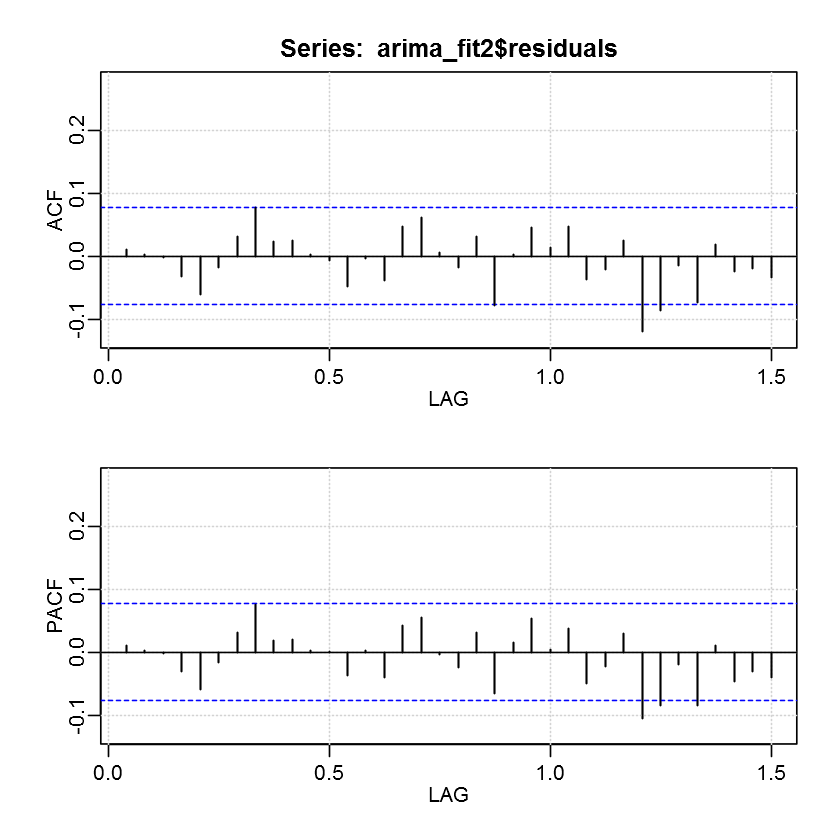

In [103]:
acf2(arima_fit2$residuals)

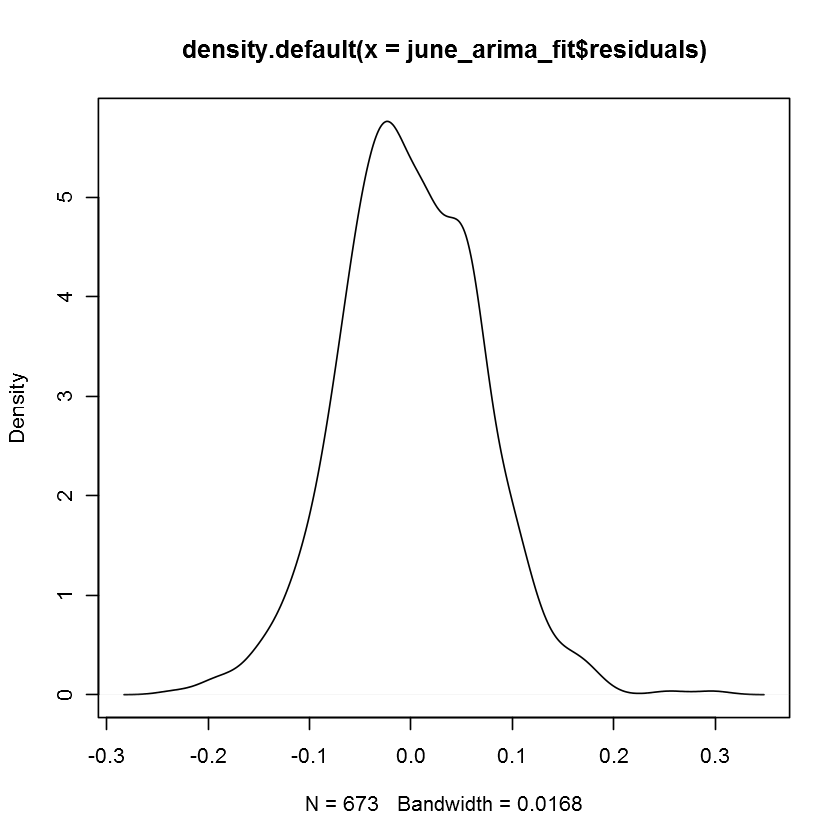

In [107]:
plot(density(june_arima_fit$residuals))